# **KLUSTERISASI K-MEANS DENGAN 2, 3, DAN 4 CLUSTER**

In [13]:
%pip install pymysql
%pip install psycopg2

## **Menggabungkan Data PostgreSQL dan MySQL.**

Kode yang digunakan bertujuan untuk mengambil data dari dua sumber basis data yang berbeda, yakni PostgreSQL dan MySQL, lalu menggabungkannya menjadi satu tabel menggunakan library Pandas. Beberapa library yang diimpor antara lain psycopg2 untuk koneksi ke PostgreSQL, pymysql untuk koneksi ke MySQL, numpy untuk manipulasi data numerik (meskipun tidak digunakan secara eksplisit di sini), serta pandas untuk manipulasi data dalam bentuk DataFrame.

Fungsi get_pg_data() digunakan untuk mengambil data dari PostgreSQL. Koneksi ke database dibuka menggunakan informasi login yang diberikan, kemudian query SELECT * FROM sepal_postgresql dijalankan untuk mengambil seluruh baris dari tabel tersebut. Hasilnya disimpan ke dalam variabel data, sementara nama kolom diperoleh dari metadata query melalui cursor.description. Data yang didapat kemudian dikonversi ke dalam bentuk DataFrame menggunakan Pandas.

Hal serupa dilakukan oleh fungsi get_mysql_data(), yang bertugas mengambil data dari MySQL. Koneksi dibuat ke server MySQL, lalu dijalankan query SELECT * FROM petalmysql, dan hasilnya diubah menjadi DataFrame dengan cara yang sama seperti pada PostgreSQL.

Kedua fungsi ini kemudian menghasilkan dua DataFrame, yaitu df_postgresql dan df_mysql, yang masing-masing mewakili data dari tabel PostgreSQL dan MySQL. Kedua DataFrame tersebut diasumsikan memiliki kolom id dan class, yang dijadikan dasar untuk proses penggabungan data. Penggabungan dilakukan dengan fungsi pd.merge() dari Pandas menggunakan parameter on=["id", "class"] dan how="inner", yang berarti hanya data yang memiliki kecocokan pada kedua kolom di kedua DataFrame yang akan disertakan dalam hasil akhir.

Hasil dari penggabungan ini adalah DataFrame bernama df_merged, yang berisi informasi lengkap dari kedua tabel. DataFrame ini kemudian ditampilkan ke layar dengan print(df_merged.to_string(index=False)), agar semua baris ditampilkan tanpa indeks, sehingga lebih rapi dan mudah dibaca.

Secara keseluruhan, kode ini mengintegrasikan dua sumber data iris (kemungkinan data sepal dan petal) yang tersimpan di dua sistem database berbeda, dan menghasilkan satu DataFrame gabungan yang siap digunakan untuk analisis lanjutan seperti visualisasi, reduksi dimensi, atau pengelompokan (clustering).

In [14]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-1b2607ab-mysqlmalik.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_vrtLmaekbIjPLe1BVzC",
        database="defaultdb",
        port=10845
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM sepal_postgresql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-36e0c60-mysqlmalik.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_nDXL4gOogFn3sSgwrBm",
        database="defaultdb",
        port=10845
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM petalmysql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Cetak semua data hasil gabungan tanpa indeks
print(df_merged.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width
  1     Iris-setosa           1.4          0.2           5.1          3.5
  2     Iris-setosa          14.0          2.0          40.9         30.0
  3     Iris-setosa           1.3          0.2           4.7          3.2
  4     Iris-setosa          15.0         20.0          46.0         31.0
  5     Iris-setosa           1.4          0.2           5.0          3.6
  6     Iris-setosa           1.7          0.4           5.4          3.9
  7     Iris-setosa           1.4          0.3           4.6          3.4
  8     Iris-setosa           1.5          0.2           5.0          3.4
  9     Iris-setosa           1.4          0.2           4.4          2.9
 10     Iris-setosa           1.5          0.1           4.9          3.1
 11     Iris-setosa           1.5          0.2           5.4          3.7
 12     Iris-setosa          16.0         20.0          48.0         34.0
 13     Iris-setosa           1.4     

## **Data Asli Sebelum Normalisasi**

Kode ini digunakan untuk menerapkan teknik Principal Component Analysis (PCA) pada data mentah yang belum melalui proses normalisasi, serta menampilkan hasil transformasinya dalam bentuk visualisasi dua dimensi (2D) dan tiga dimensi (3D) menggunakan library matplotlib.

Langkah pertama adalah mengimpor PCA dari sklearn.decomposition dan pyplot dari matplotlib untuk kebutuhan visualisasi. Data yang dianalisis berasal dari df_merged, yaitu hasil penggabungan data dari dua sumber database berbeda (PostgreSQL dan MySQL) yang sudah berisi seluruh fitur iris. Sebelum dilakukan analisis PCA, kolom 'id' dan 'class' dihapus karena keduanya bukan bagian dari fitur numerik yang diperlukan untuk PCA.

Selanjutnya, dilakukan reduksi dimensi ke dua komponen utama menggunakan PCA(n_components=2), dan hasilnya disimpan dalam variabel pca_2d_raw. Proses ini dilakukan langsung pada data mentah, tanpa dilakukan normalisasi terlebih dahulu. Hasil reduksi tersebut divisualisasikan sebagai scatter plot 2D dengan warna abu-abu dan tingkat transparansi (alpha=0.7) agar persebaran titik terlihat jelas meskipun terjadi tumpang tindih.

Setelah itu, dilakukan lagi PCA dengan mengurangi dimensi ke tiga komponen utama menggunakan PCA(n_components=3), dan hasilnya disimpan dalam pca_3d_raw. Visualisasi 3D dari hasil ini dibuat dengan menggunakan Axes3D dari matplotlib, sehingga kita bisa melihat persebaran data dalam ruang tiga dimensi berdasarkan hasil transformasi PCA.

Visualisasi awal ini sangat berguna untuk eksplorasi awal terhadap struktur data. Tanpa melakukan normalisasi atau pemrosesan lebih lanjut, kita sudah bisa mendapatkan wawasan awal mengenai potensi adanya pola, klaster alami, atau pemisahan antar data yang mungkin ada dalam dataset.

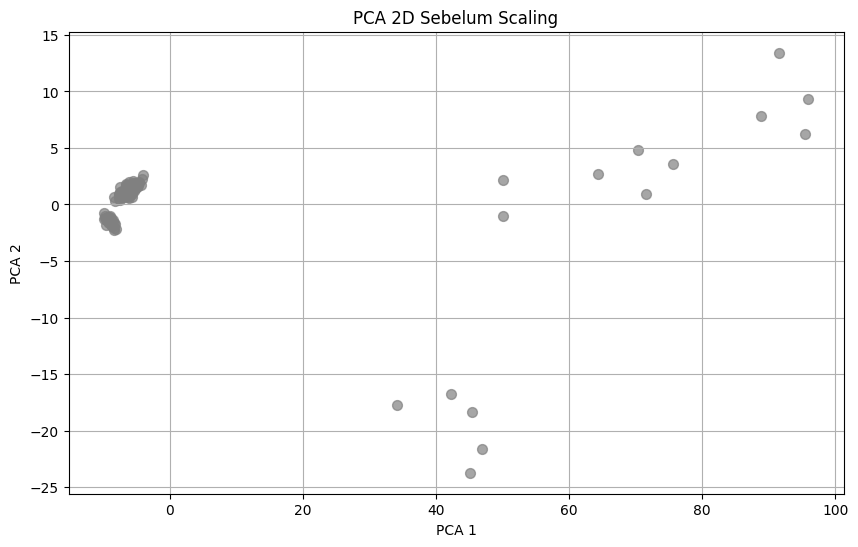

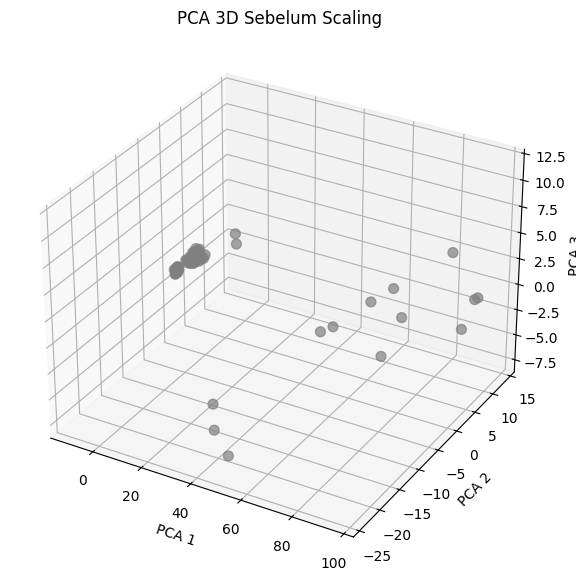

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Ambil fitur numerik mentah (tanpa scaling)
features_raw = df_merged.drop(columns=['id', 'class'])

# PCA langsung pada data mentah
pca_raw = PCA(n_components=2)
pca_2d_raw = pca_raw.fit_transform(features_raw)

# Visualisasi
plt.figure(figsize=(10, 6))
plt.scatter(pca_2d_raw[:, 0], pca_2d_raw[:, 1], c='gray', s=50, alpha=0.7)
plt.title("PCA 2D Sebelum Scaling")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

pca_raw_3d = PCA(n_components=3)
pca_3d_raw = pca_raw_3d.fit_transform(features_raw)

# Visualisasi 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_3d_raw[:, 0], pca_3d_raw[:, 1], pca_3d_raw[:, 2],
           c='gray', s=50, alpha=0.7)

ax.set_title("PCA 3D Sebelum Scaling")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()


## **Normalisasi Data dan Reduksi Dimensi Menggunakan PCA**

Kode ini digunakan untuk melakukan normalisasi data dengan metode MinMaxScaler, lalu menerapkan teknik Principal Component Analysis (PCA) untuk mereduksi dimensi data ke dalam bentuk dua dimensi (2D) dan tiga dimensi (3D), yang kemudian divisualisasikan menggunakan matplotlib.

Langkah awal dimulai dengan mengambil fitur numerik dari DataFrame gabungan df_merged, yang merupakan hasil penggabungan data dari database PostgreSQL dan MySQL. Pada tahap ini, kolom 'id' dan 'class' dihapus menggunakan perintah features_raw = df_merged.drop(columns=['id', 'class']), karena keduanya bukan bagian dari fitur numerik yang relevan untuk analisis PCA.

Setelah itu, data dinormalisasi menggunakan MinMaxScaler, yang mengubah skala setiap fitur agar berada dalam rentang antara 0 hingga 1. Proses normalisasi ini sangat penting karena PCA peka terhadap perbedaan skala antar fitur; tanpa normalisasi, fitur dengan variansi besar bisa mendominasi hasil PCA.

Berikutnya, dilakukan reduksi dimensi menggunakan PCA(n_components=2) untuk mengubah data menjadi dua komponen utama. Hasil transformasi ini disimpan dalam variabel pca_2d_data, dan divisualisasikan dalam bentuk scatter plot 2D. Visualisasi menggunakan warna abu-abu untuk menandai bahwa belum ada pengelompokan atau label tertentu, serta tingkat transparansi (alpha=0.7) agar persebaran data lebih mudah diamati meskipun terjadi tumpang tindih antar titik.

Kemudian, PCA diterapkan kembali namun kali ini untuk mereduksi data menjadi tiga dimensi menggunakan PCA(n_components=3), dengan hasil transformasi disimpan di pca_3d_data. Scatter plot 3D dari hasil ini divisualisasikan dengan bantuan objek Axes3D dari matplotlib, memperlihatkan pola persebaran data dalam tiga komponen utama yang telah dinormalisasi sebelumnya.

Visualisasi dalam bentuk 2D dan 3D ini sangat membantu dalam tahapan eksplorasi data. Dengan cara ini, kita dapat melihat distribusi data dalam ruang berdimensi rendah dan mengidentifikasi potensi pola atau klaster yang mungkin muncul. Proses normalisasi yang dilakukan sebelumnya memastikan bahwa hasil PCA lebih seimbang dan mampu merepresentasikan struktur data secara lebih akurat.

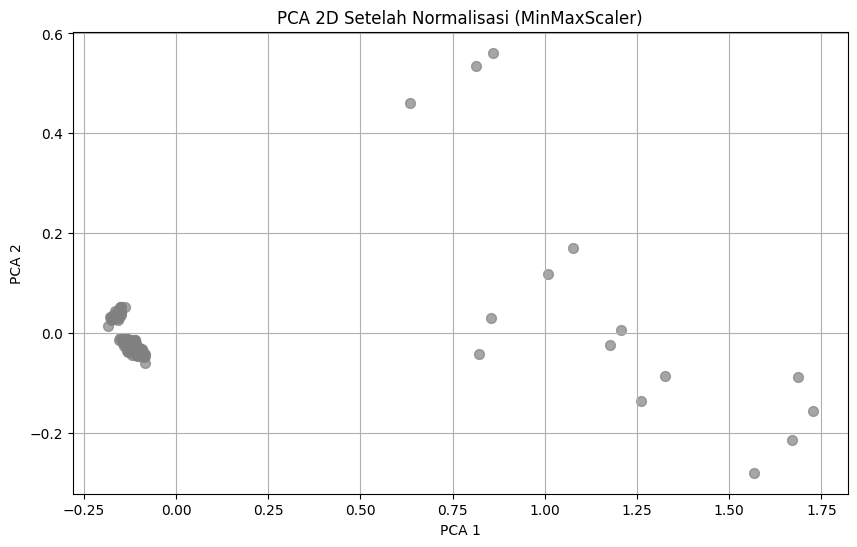

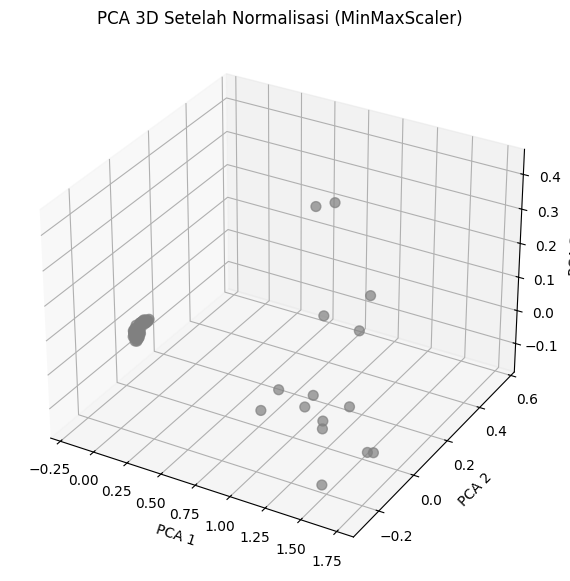

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # untuk 3D plot

# Ambil fitur numerik
features_raw = df_merged.drop(columns=['id', 'class'])

# Normalisasi dengan MinMaxScaler
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features_raw)

# PCA 2D setelah normalisasi
pca_2d = PCA(n_components=2)
pca_2d_data = pca_2d.fit_transform(normalized_features)

# Visualisasi PCA 2D
plt.figure(figsize=(10, 6))
plt.scatter(pca_2d_data[:, 0], pca_2d_data[:, 1], c='gray', s=50, alpha=0.7)
plt.title("PCA 2D Setelah Normalisasi (MinMaxScaler)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

# PCA 3D setelah normalisasi
pca_3d = PCA(n_components=3)
pca_3d_data = pca_3d.fit_transform(normalized_features)

# Visualisasi PCA 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_3d_data[:, 0], pca_3d_data[:, 1], pca_3d_data[:, 2],
           c='gray', s=50, alpha=0.7)

ax.set_title("PCA 3D Setelah Normalisasi (MinMaxScaler)")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()


## **Preprocessing Data dan Reduksi Dimensi dengan PCA**

Pra-pemrosesan Data dan Reduksi Dimensi dengan PCA
Kode ini digunakan untuk membandingkan dua metode normalisasi data, yaitu StandardScaler dan MinMaxScaler, dalam konteks reduksi dimensi menggunakan teknik Principal Component Analysis (PCA), serta untuk mengevaluasi bagaimana masing-masing metode memengaruhi representasi data dalam dimensi yang lebih rendah.

Langkah pertama adalah mengekstrak fitur numerik dari DataFrame gabungan df_merged—hasil dari penggabungan data dari PostgreSQL dan MySQL—dengan menghapus kolom 'id' dan 'class', menggunakan features = df_merged.drop(columns=['id', 'class']). Kolom-kolom ini dikeluarkan karena tidak termasuk fitur numerik yang diperlukan dalam proses PCA.

Selanjutnya, dilakukan dua pendekatan normalisasi yang berbeda:

1. **StandardScaler**

  Pada pendekatan ini, setiap fitur distandarisasi sehingga memiliki nilai rata-rata 0 dan standar deviasi 1, menghasilkan dataset bernama standard_scaled. Proses ini penting terutama ketika fitur memiliki satuan atau skala yang berbeda-beda. Setelah normalisasi, PCA dengan dua komponen utama diterapkan menggunakan PCA(n_components=2), dan hasil transformasi disimpan dalam standard_reduced.

2. **MinMaxScaler**

  Metode ini melakukan normalisasi dengan mengubah nilai fitur ke dalam rentang [0, 1], menghasilkan dataset bernama minmax_scaled. Setelah skala data diubah, PCA kembali diterapkan (juga dengan dua komponen utama) menggunakan PCA(n_components=2), dan hasilnya disimpan di minmax_reduced.

Kedua hasil reduksi ini memberikan dua visualisasi berbeda dalam ruang berdimensi dua, yang memungkinkan kita untuk membandingkan dampak dari metode normalisasi terhadap distribusi data setelah PCA. Perbandingan ini sangat bermanfaat dalam tahapan visualisasi, pengelompokan data (clustering), maupun implementasi model machine learning, karena performa model sangat mungkin dipengaruhi oleh teknik pra-pemrosesan yang digunakan sebelumnya.

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

# Drop kolom non-numerik
features = df_merged.drop(columns=['id', 'class'])

# StandardScaler
standard_scaler = StandardScaler()
standard_scaled = standard_scaler.fit_transform(features)
standard_pca = PCA(n_components=2)
standard_reduced = standard_pca.fit_transform(standard_scaled)

# MinMaxScaler
minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(features)
minmax_pca = PCA(n_components=2)
minmax_reduced = minmax_pca.fit_transform(minmax_scaled)

In [18]:
print(standard_scaled)
print("-----------------")
print(minmax_scaled)

[[-0.47336355 -0.4992233  -0.36768452 -0.27454238]
 [ 0.5357241  -0.11465756  1.78761061  2.8056325 ]
 [-0.48137218 -0.4992233  -0.39176603 -0.30941228]
 [ 0.61581042  3.73099981  2.09464986  2.92186551]
 [-0.47336355 -0.4992233  -0.3737049  -0.26291908]
 [-0.44933765 -0.45649377 -0.34962339 -0.22804917]
 [-0.47336355 -0.47785854 -0.39778641 -0.28616568]
 [-0.46535492 -0.4992233  -0.3737049  -0.28616568]
 [-0.47336355 -0.4992233  -0.40982716 -0.34428219]
 [-0.46535492 -0.52058806 -0.37972527 -0.32103559]
 [-0.46535492 -0.4992233  -0.34962339 -0.25129578]
 [ 0.69589674  3.73099981  2.2150574   3.27056455]
 [-0.47336355 -0.52058806 -0.38574565 -0.33265889]
 [-0.49738945 -0.52058806 -0.41584754 -0.33265889]
 [-0.48938081 -0.4992233  -0.32554188 -0.21642587]
 [-0.46535492 -0.45649377 -0.33156225 -0.16993267]
 [-0.48137218 -0.45649377 -0.34962339 -0.22804917]
 [-0.47336355 -0.47785854 -0.36768452 -0.27454238]
 [-0.44933765 -0.47785854 -0.33156225 -0.23967248]
 [-0.46535492 -0.47785854 -0.36

## **Klusterisasi KMeans dengan 2 Cluster dan Visualisasi Hasil PCA.**

Kode ini digunakan untuk melakukan clustering pada data yang telah dinormalisasi dengan **MinMaxScaler**, menggunakan algoritma** KMeans** untuk membagi data menjadi **dua cluster**, kemudian divisualisasikan dalam ruang tiga dimensi menggunakan **PCA** dan matplotlib.

Pertama, data hasil normalisasi (minmax_scaled) direduksi dimensinya menjadi tiga komponen utama menggunakan **PCA**, dan hasil transformasinya disimpan dalam minmax_reduced_3d. Reduksi ini memungkinkan visualisasi data berdimensi tinggi ke dalam format 3D yang tetap mempertahankan informasi penting dari data aslinya.

Selanjutnya, dilakukan proses clustering menggunakan algoritma **KMeans** dengan parameter n_clusters=2 untuk membagi data ke dalam dua kelompok. Nilai random_state=42 digunakan agar hasil clustering dapat direproduksi, dan n_init=10 memastikan inisialisasi pusat cluster dilakukan beberapa kali untuk mendapatkan hasil terbaik. Setelah proses ini, setiap data diberi label cluster dan disimpan dalam labels_2.

Evaluasi terhadap hasil clustering dilakukan menggunakan dua metrik utama:

1. **Inertia**, yang menunjukkan jumlah total kuadrat jarak antara titik data dan pusat clusternya. Semakin kecil nilai inertia, semakin kompak cluster yang terbentuk.

2. **Silhouette Score**, yang mengukur seberapa baik data dalam satu cluster saling berdekatan dan seberapa jauh dari cluster lain. Nilainya antara -1 hingga 1, dan nilai yang mendekati 1 menunjukkan pemisahan cluster yang baik.

Nilai dari kedua metrik tersebut ditampilkan dengan print sebagai bahan evaluasi.

Setelah evaluasi, data divisualisasikan dalam grafik 3D menggunakan objek Axes3D dari matplotlib. Plot berukuran lebih besar (figsize=(12, 8)) untuk meningkatkan keterbacaan. Setiap titik diberi warna sesuai label clusternya (c=labels_2), dengan skema warna 'viridis' agar perbedaan antar cluster terlihat jelas.

Grafik dilengkapi dengan label sumbu dan judul untuk memberikan konteks visualisasi, dan plt.tight_layout() digunakan untuk merapikan tata letak agar elemen-elemen grafik tidak saling tumpang tindih. Visualisasi ini sangat berguna untuk memahami bagaimana data dikelompokkan menjadi dua bagian berdasarkan hasil reduksi PCA dan pemodelan KMeans.

[2 Clusters] Inertia: 3.49, Silhouette Score: 0.9173


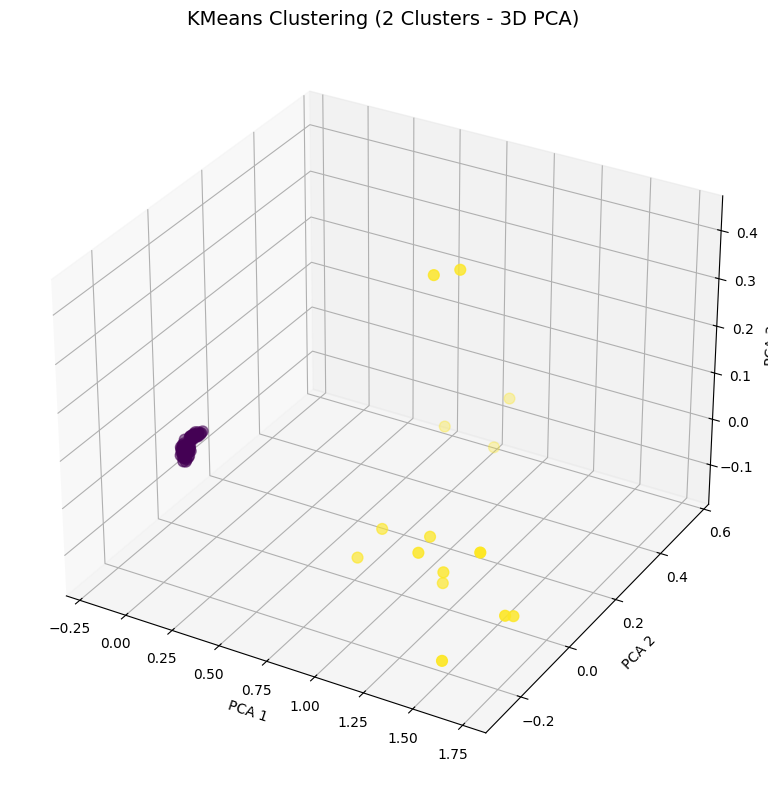

In [19]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

# PCA 3D
pca_3d = PCA(n_components=3)
minmax_reduced_3d = pca_3d.fit_transform(minmax_scaled)

# KMeans dengan 2 cluster
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_2 = kmeans_2.fit_predict(minmax_reduced_3d)

# Evaluasi
inertia_2 = kmeans_2.inertia_
silhouette_2 = silhouette_score(minmax_scaled, labels_2)

print(f"[2 Clusters] Inertia: {inertia_2:.2f}, Silhouette Score: {silhouette_2:.4f}")

# Visualisasi 3D (ukuran diperbesar)
fig = plt.figure(figsize=(12, 8))  # Lebar dan tinggi ditingkatkan
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(minmax_reduced_3d[:, 0], minmax_reduced_3d[:, 1], minmax_reduced_3d[:, 2],
                c=labels_2, cmap='viridis', s=60)

ax.set_title("KMeans Clustering (2 Clusters - 3D PCA)", fontsize=14)
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.tight_layout()
plt.grid(True)
plt.show()


## **Klusterisasi KMeans dengan 3 Cluster dan Visualisasi Hasil PCA.**

Kode ini digunakan untuk menerapkan **algoritma KMeans dengan 3 klaster** pada data numerik yang telah melalui proses normalisasi menggunakan **MinMaxScaler**, kemudian direduksi dimensinya menjadi bentuk dua dan tiga dimensi menggunakan **Principal Component Analysis (PCA)**. Tujuan utamanya adalah mengevaluasi dan memvisualisasikan hasil pengelompokan data berdasarkan pola tersembunyi di dalamnya.

Langkah awal dimulai dari data minmax_scaled, yaitu hasil normalisasi fitur numerik. Data ini kemudian diproses menggunakan PCA untuk menghasilkan dua versi representasi: satu dalam dua dimensi (minmax_reduced_2d) dan satu lagi dalam tiga dimensi (minmax_reduced_3d). Reduksi ini bertujuan untuk menyederhanakan struktur data sambil mempertahankan informasi penting, sehingga dapat divisualisasikan secara lebih intuitif.

Selanjutnya, algoritma **KMeans** dijalankan dengan jumlah klaster sebanyak tiga. Objek kmeans_3 dibuat dengan parameter random_state=42 untuk memastikan reprodusibilitas hasil, serta n_init=10 yang berarti model akan menjalankan proses inisialisasi sebanyak 10 kali dengan centroid berbeda dan memilih hasil terbaik berdasarkan nilai inertia terkecil. Setelah pelatihan, model menghasilkan label klaster (labels_3) yang mengelompokkan setiap data ke dalam salah satu dari tiga klaster.

Evaluasi hasil klaster dilakukan menggunakan dua metrik:

1. **Inertia**, yaitu total jumlah kuadrat jarak antara titik data dengan pusat klasternya. Nilai inertia yang lebih kecil menunjukkan bahwa data berada lebih dekat dengan pusat kelompoknya.

2. **Silhouette Score**, yaitu ukuran seberapa baik sebuah titik cocok berada di dalam klasternya dibandingkan dengan klaster lain. Nilai mendekati 1 menunjukkan bahwa pemisahan antar klaster cukup baik.

Visualisasi hasil dilakukan dalam dua bentuk:

1. **Plot 2D** menggunakan data dari minmax_reduced_2d, dengan pewarnaan berbeda sesuai label klaster masing-masing untuk menunjukkan pembagian kelompok pada bidang dua dimensi.

2. **Plot 3D** menggunakan data dari minmax_reduced_3d, divisualisasikan menggunakan Axes3D dari matplotlib. Setiap titik diberi warna berdasarkan klasternya, memungkinkan kita melihat pola distribusi dalam ruang tiga dimensi.

Dengan pendekatan ini, kita bisa mengamati bagaimana data yang telah dinormalisasi dan direduksi dimensinya dapat terkelompokkan menjadi tiga bagian yang kemungkinan besar mencerminkan tiga spesies dalam dataset Iris. Evaluasi dan visualisasi ini sangat bermanfaat dalam memahami struktur dan kualitas hasil clustering.

[3 Clusters] Inertia: 1.65, Silhouette Score: 0.9015


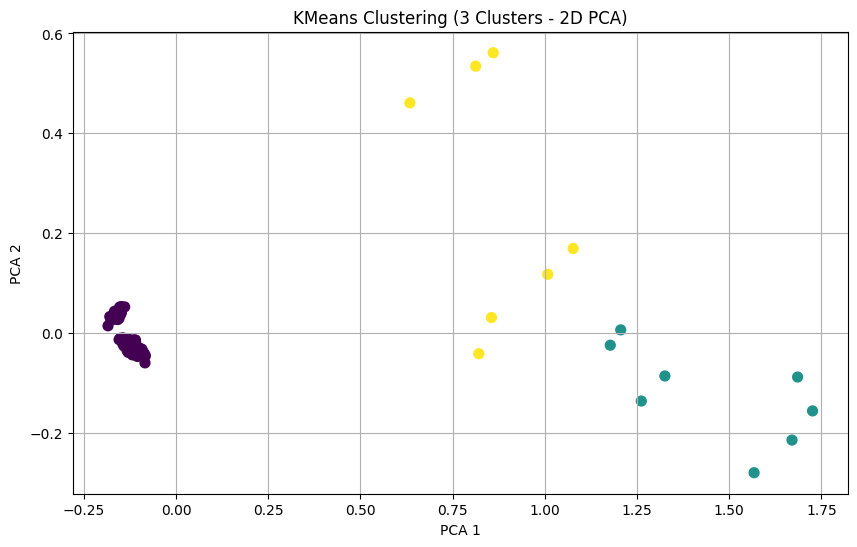

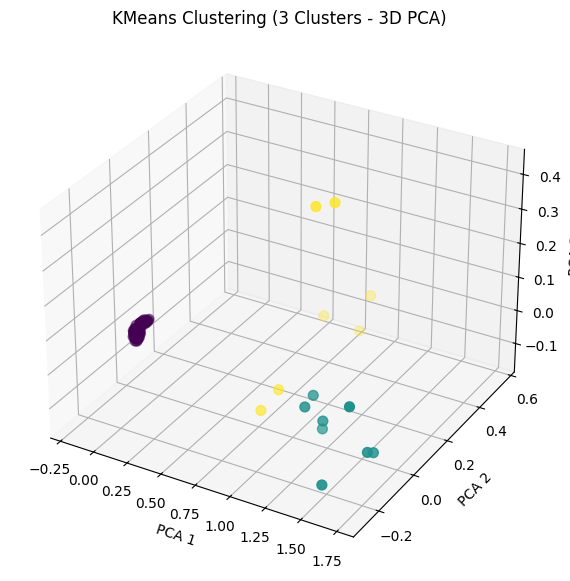

In [20]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D  # Untuk plotting 3D

# PCA 2D (jika belum dilakukan sebelumnya)
pca_2d = PCA(n_components=2)
minmax_reduced_2d = pca_2d.fit_transform(minmax_scaled)

# PCA 3D
pca_3d = PCA(n_components=3)
minmax_reduced_3d = pca_3d.fit_transform(minmax_scaled)

# KMeans dengan 3 cluster
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_3 = kmeans_3.fit_predict(minmax_scaled)

# Evaluasi
inertia_3 = kmeans_3.inertia_
silhouette_3 = silhouette_score(minmax_scaled, labels_3)

print(f"[3 Clusters] Inertia: {inertia_3:.2f}, Silhouette Score: {silhouette_3:.4f}")

# Visualisasi 2D
plt.figure(figsize=(10, 6))
plt.scatter(minmax_reduced_2d[:, 0], minmax_reduced_2d[:, 1], c=labels_3, cmap='viridis', s=50)
plt.title("KMeans Clustering (3 Clusters - 2D PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

# Visualisasi 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(minmax_reduced_3d[:, 0], minmax_reduced_3d[:, 1], minmax_reduced_3d[:, 2],
                c=labels_3, cmap='viridis', s=50)

ax.set_title("KMeans Clustering (3 Clusters - 3D PCA)")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()


## **Klusterisasi KMeans dengan 4 Cluster dan Visualisasi Hasil PCA.**

Kode ini digunakan untuk melakukan proses clustering menggunakan algoritma KMeans dengan 4 klaster pada data yang telah melalui normalisasi menggunakan MinMaxScaler, kemudian direduksi dimensinya ke bentuk 2D dan 3D menggunakan Principal Component Analysis (PCA). Tujuan utamanya adalah untuk menganalisis struktur pengelompokan data serta menyajikannya dalam bentuk visual yang lebih mudah dipahami.

Langkah pertama dimulai dengan mereduksi dimensi data numerik yang telah dinormalisasi (minmax_scaled) menjadi dua dimensi (minmax_reduced_2d) dan tiga dimensi (minmax_reduced_3d) menggunakan PCA(n_components=2) dan PCA(n_components=3). Proses ini bertujuan menyederhanakan kompleksitas data sembari tetap mempertahankan komponen utama yang mewakili variasi paling signifikan dalam fitur.

Selanjutnya, dilakukan proses clustering menggunakan KMeans dengan jumlah klaster yang ditentukan sebanyak empat (n_clusters=4). Parameter random_state=42 digunakan untuk memastikan hasil yang konsisten saat dijalankan ulang, dan n_init=10 mengindikasikan bahwa inisialisasi akan dilakukan sebanyak 10 kali dengan pemilihan hasil terbaik berdasarkan nilai inertia terendah. Dari proses ini dihasilkan labels_4, yaitu label klaster untuk setiap data.

Untuk mengukur kualitas pengelompokan, dua metrik evaluasi digunakan:

Inertia, yakni jumlah total kuadrat jarak antara data dan pusat klasternya. Semakin rendah nilai ini, semakin baik data terkonsentrasi dalam klasternya masing-masing.

Silhouette Score, yaitu ukuran seberapa baik masing-masing titik data berada di dalam klaster dibandingkan dengan klaster lainnya. Nilai mendekati 1 menunjukkan klaster yang terpisah dengan baik, sementara nilai mendekati 0 mengindikasikan adanya tumpang tindih antar klaster.

Visualisasi hasil clustering disajikan dalam dua format:

Plot 2D, menggunakan minmax_reduced_2d, di mana data ditampilkan dalam scatter plot dua dimensi dengan warna berbeda sesuai label klaster.

Plot 3D, menggunakan minmax_reduced_3d, divisualisasikan dengan bantuan Axes3D untuk menampilkan distribusi data dalam ruang tiga dimensi.

Visualisasi ini memberikan gambaran yang jelas mengenai bagaimana data terkelompok dalam empat klaster, serta membantu dalam mengevaluasi apakah jumlah klaster yang digunakan sudah mencerminkan pola alami yang ada dalam data. Jika skor silhouette rendah atau visualisasi menunjukkan tumpang tindih, maka kemungkinan jumlah klaster tersebut belum optimal.



[4 Clusters] Inertia: 1.06, Silhouette Score: 0.9007


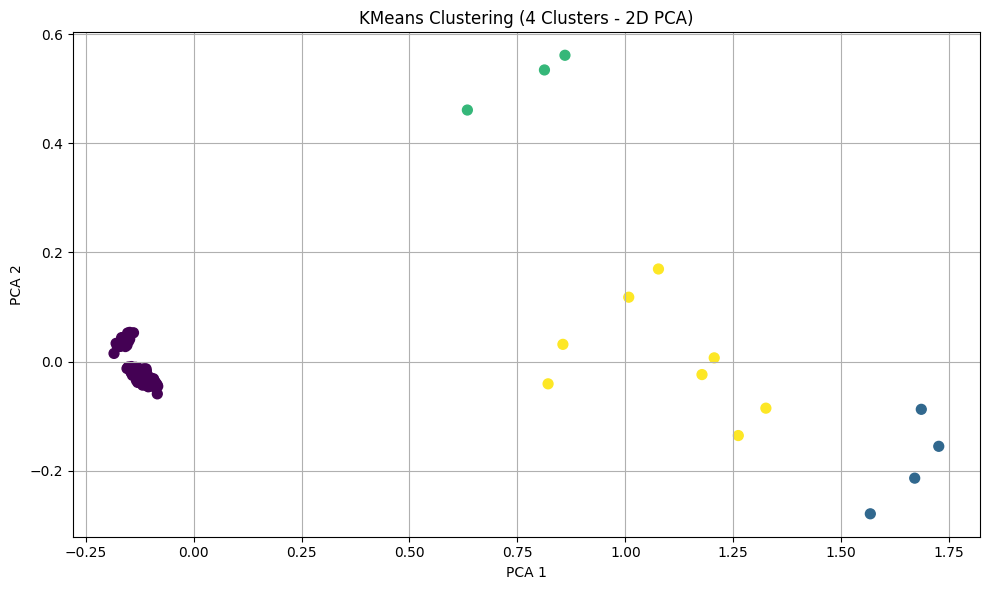

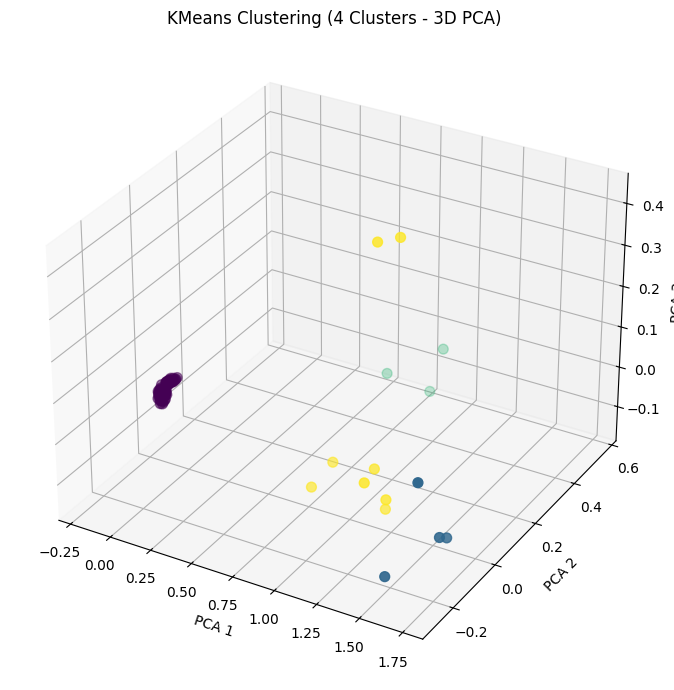

In [21]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# PCA 2D dan 3D
pca_2d = PCA(n_components=2)
minmax_reduced_2d = pca_2d.fit_transform(minmax_scaled)

pca_3d = PCA(n_components=3)
minmax_reduced_3d = pca_3d.fit_transform(minmax_scaled)

# KMeans dengan 4 cluster
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_4 = kmeans_4.fit_predict(minmax_scaled)

# Evaluasi
inertia_4 = kmeans_4.inertia_
silhouette_4 = silhouette_score(minmax_scaled, labels_4)

print(f"[4 Clusters] Inertia: {inertia_4:.2f}, Silhouette Score: {silhouette_4:.4f}")

# Visualisasi 2D (ukuran diperbesar)
plt.figure(figsize=(10, 6))  # Lebar ditambah
plt.scatter(minmax_reduced_2d[:, 0], minmax_reduced_2d[:, 1], c=labels_4, cmap='viridis', s=50)
plt.title("KMeans Clustering (4 Clusters - 2D PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualisasi 3D (ukuran diperbesar)
fig = plt.figure(figsize=(10, 7))  # Lebar ditambah
ax = fig.add_subplot(111, projection='3d')
ax.scatter(minmax_reduced_3d[:, 0], minmax_reduced_3d[:, 1], minmax_reduced_3d[:, 2],
           c=labels_4, cmap='viridis', s=50)

ax.set_title("KMeans Clustering (4 Clusters - 3D PCA)")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.tight_layout()
plt.grid(True)
plt.show()
